In [163]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"
df = pd.read_csv(url)
#데이터 csv파일 불러오기

In [164]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [165]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [42]:
df.isnull().sum()#null값 제거

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [43]:
df = df.dropna()

In [44]:
na_idx = df.loc[df['NA_Sales'].str.contains('K')].index
df.loc[na_idx, 'NA_Sales'] = df.loc[na_idx, 'NA_Sales'].str.replace('K', '').astype(float) * 0.001

In [45]:
eu_idx = df.loc[df['EU_Sales'].str.contains('K')].index
df.loc[eu_idx, 'EU_Sales'] = df.loc[eu_idx, 'EU_Sales'].str.replace('K', '').astype(float) * 0.001

In [46]:
jp_idx = df.loc[df['JP_Sales'].str.contains('K')].index
df.loc[jp_idx, 'JP_Sales'] = df.loc[jp_idx, 'JP_Sales'].str.replace('K', '').astype(float) * 0.001

In [47]:
other_idx = df.loc[df['Other_Sales'].str.contains('K')].index
df.loc[other_idx, 'Other_Sales'] = df.loc[other_idx, 'Other_Sales'].str.replace('K', '').astype(float) * 0.001

In [48]:
df['NA_Sales']=df['NA_Sales'].str.replace('M','').astype(float)
df['EU_Sales']=df['EU_Sales'].str.replace('M','').astype(float)
df['JP_Sales']=df['JP_Sales'].str.replace('M','').astype(float)
df['Other_Sales']=df['Other_Sales'].str.replace('M','').astype(float)

In [49]:
df.info()#Sales값 M단위로 평준화

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16147 non-null  float64
 6   EU_Sales     16143 non-null  float64
 7   JP_Sales     16143 non-null  float64
 8   Other_Sales  16144 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.7+ MB


In [50]:
df['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']# 총판매량 추가
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [51]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16241.000000,16147.000000,16143.000000,16143.000000,16144.000000,15859.000000
mean,1994.178437,0.264802,0.147335,0.078286,0.048290,0.539504
std,155.484265,0.823231,0.509004,0.309318,0.190128,1.574216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<AxesSubplot:>

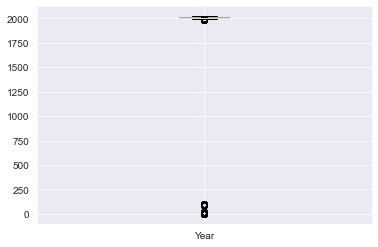

In [52]:
df.boxplot(column=['Year'])#이상치탐색

In [53]:
df = df[df.Year > 1900]

In [54]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16141.000000,16048.000000,16045.000000,16043.000000,16044.000000,15762.000000
mean,2006.406356,0.264743,0.147256,0.077952,0.048281,0.538979
std,5.830780,0.823403,0.509120,0.306802,0.190392,1.572365
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


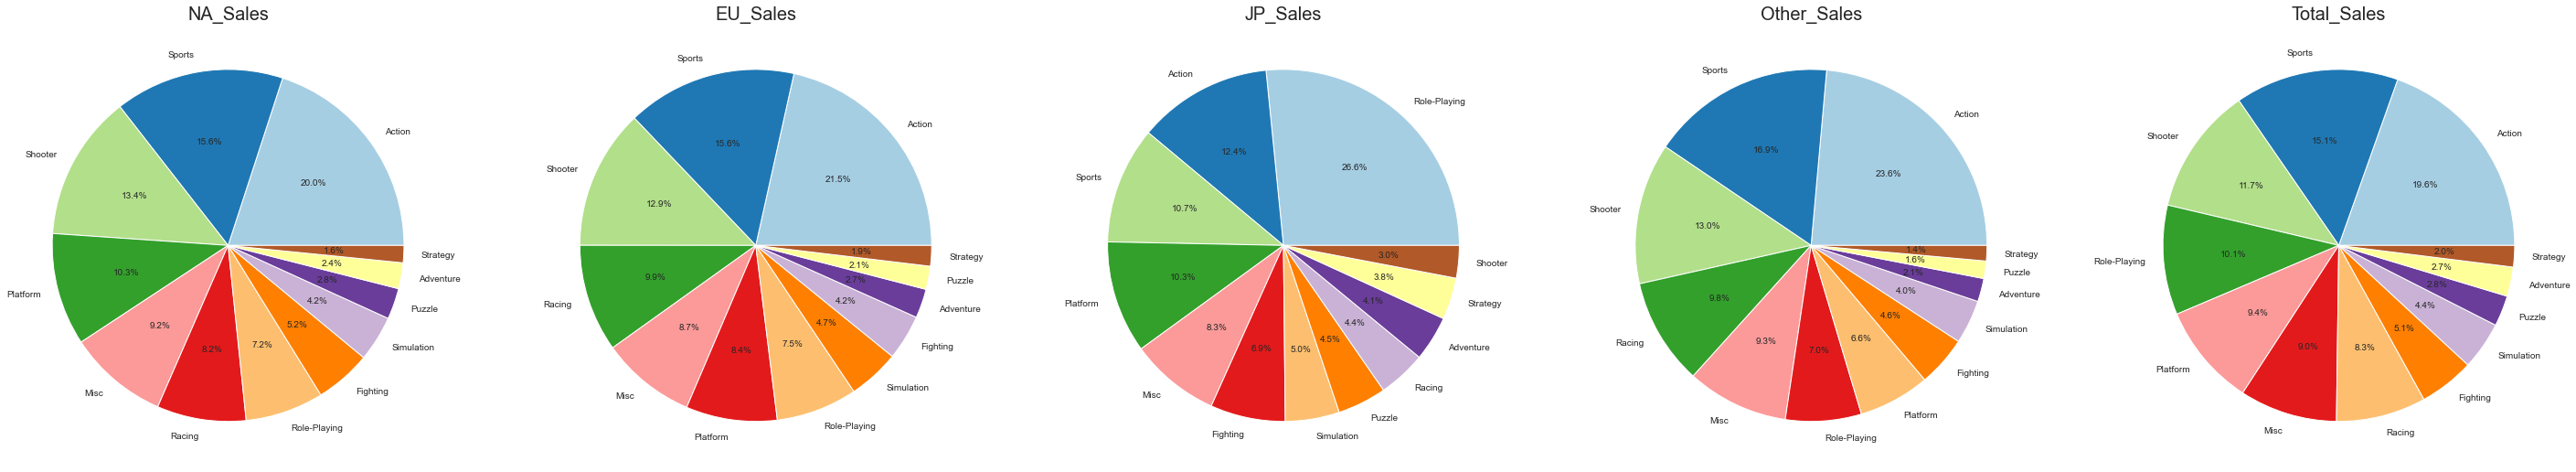

In [89]:
#지역별 선호하는 게임장르 파악을 위한 시각화
na = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending =False)
eu = df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending =False)
jp = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending =False)
other = df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending =False)
total= df.groupby('Genre')['Total_Sales'].sum().sort_values(ascending =False)


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(50,15))
ax1.pie(na, labels=na.index, autopct='%1.1f%%')
ax2.pie(eu, labels=eu.index, autopct='%1.1f%%')
ax3.pie(jp, labels=jp.index, autopct='%1.1f%%')
ax4.pie(other, labels=other.index, autopct='%1.1f%%')
ax5.pie(total, labels=total.index, autopct='%1.1f%%')
ax1.set_title("NA_Sales", fontsize=20)
ax2.set_title("EU_Sales", fontsize=20)
ax3.set_title("JP_Sales", fontsize=20)
ax4.set_title("Other_Sales", fontsize=20)
ax5.set_title("Total_Sales", fontsize=20)
plt.show()

In [159]:
trend=df.groupby(['Year','Genre'], as_index=False).count()
trend.rename(columns={'Name':'Count'},inplace = True)

<AxesSubplot:xlabel='Year', ylabel='Count'>

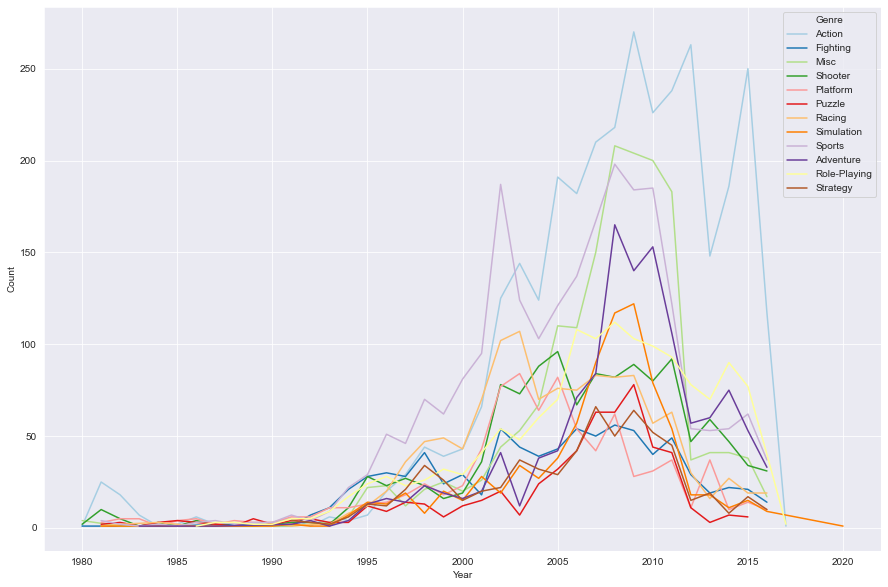

In [160]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='Count', hue='Genre', data=trend )